In [13]:
# import pandas as pd for data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [14]:
df=pd.read_csv('CHD.csv')
selected_columns = ['CHD','HighBP','BMI', 'GenHlth', 'Stroke','Age', 'Sex', 'HighChol', 'DiffWalk', 'Smoker', 'Diabetes','MentHlth','Income']
df=df[selected_columns]

In [15]:
df['CHD'].value_counts()

No     229787
Yes     23893
Name: CHD, dtype: int64

In [3]:
# retrieve all labels and store in a list
columns_df = list(df.columns.values)
# iterate over the list to print all unique values of each column in the dataframe
for column in columns_df:
    print(column, ':', str(df[column].unique()))

CHD : ['No' 'Yes']
HighBP : ['Yes' 'No']
BMI : [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
GenHlth : ['Excellent' 'Good' 'Fair' 'Very good' 'Poor']
Stroke : ['No' 'Yes']
Age : ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Sex : ['Female' 'Male']
HighChol : ['Yes' 'No']
DiffWalk : ['Yes' 'No']
Smoker : ['Yes' 'No']
Diabetes : ['No' 'No, borderline diabetes' 'Yes']
MentHlth : [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
Income : [3 1 8 6 4 7 2 5]


In [4]:
# list of numerical features
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['BMI', 'MentHlth', 'Income'], dtype='object')

In [5]:
# list of categorical features
categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['CHD', 'HighBP', 'GenHlth', 'Stroke', 'Age', 'Sex', 'HighChol',
       'DiffWalk', 'Smoker', 'Diabetes'],
      dtype='object')

In [6]:
# encode 'AgeCategory' column
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['Age'] = df['Age'].apply(lambda x: encode_AgeCategory[x])
df['Age'] = df['Age'].astype(int)
df['Age']

0         57
1         80
2         67
3         77
4         42
          ..
253675    32
253676    57
253677    77
253678    67
253679    47
Name: Age, Length: 253680, dtype: int32

In [7]:
df.describe()[1:][list(numeric_features)].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,28.382364,6.608694,12.000000,24.000000,27.000000,31.000000,98.000000
MentHlth,3.184772,7.412847,0.000000,0.000000,0.000000,2.000000,30.000000
Income,6.053875,2.071148,1.000000,5.000000,7.000000,8.000000,8.000000


In [8]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Get a list of categorical column names
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    if len(df[col].unique()) <= 2:
        # label encode binary variables
        df[col] = le.fit_transform(df[col])
    else:
        # one-hot encode non-binary variables
        df = pd.get_dummies(df, columns=[col])

df.head()

,CHD,HighBP,BMI,Stroke,Age,Sex,HighChol,DiffWalk,Smoker,MentHlth,Income,GenHlth_Excellent,GenHlth_Fair,GenHlth_Good,GenHlth_Poor,GenHlth_Very good,Diabetes_No,"Diabetes_No, borderline diabetes",Diabetes_Yes
0,0,1,40,0,57,0,1,1,1,18,3,1,0,0,0,0,1,0,0
1,0,0,25,0,80,0,0,0,1,0,1,0,0,1,0,0,1,0,0
2,0,1,28,0,67,0,1,1,0,30,8,1,0,0,0,0,1,0,0
3,0,1,27,0,77,0,0,0,0,0,6,0,1,0,0,0,1,0,0
4,0,1,24,0,42,0,1,0,0,3,4,0,1,0,0,0,1,0,0


# data split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# split the dataset into train and test set with 80% and 20% respectively
train_data, test_data = train_test_split(df, train_size=0.80) 
train_data.shape, test_data.shape

((202944, 19), (50736, 19))

In [12]:
# split the dataset into train and test set for NEW encoding method
train_data_label, test_data_label = train_test_split(df, train_size=0.80)
train_data_label.shape, test_data_label.shape

((202944, 19), (50736, 19))

In [12]:
# split the train and test set into features and labels
X_train= train_data.drop('CHD', axis=1)
y_train= train_data['CHD']
print(X_train.shape, y_train.shape)

(255836, 15) (255836,)


In [13]:
X_test= test_data.drop('CHD', axis=1)
y_test= test_data['CHD']
print(X_test.shape, y_test.shape)

(63959, 15) (63959,)


In [14]:
# split the train and test set for the NEW encoding method
X_train_new= train_data_label.drop('CHD', axis=1)
y_train_new= train_data_label['CHD']
print(X_train_new.shape, y_train_new.shape)

X_test_new= test_data_label.drop('CHD', axis=1)
y_test_new= test_data_label['CHD']
print(X_test_new.shape, y_test_new.shape)

(255836, 15) (255836,)
(63959, 15) (63959,)


In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# there is no data-leakage because we are using 
# information of train in test not test in train
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# for NEW encoding method
X_train_new=sc.fit_transform(X_train_new)
X_test_new=sc.transform(X_test_new)

In [16]:
# X_train after scaling
X_train

array([[-0.40142735, -0.19816602, -0.69744701, ..., -0.14688306,
        -0.38347252, -0.08961031],
       [ 2.4911108 , -0.19816602,  1.27636574, ..., -0.14688306,
        -0.38347252, -0.08961031],
       [ 2.4911108 , -0.19816602,  0.71241924, ..., -0.14688306,
        -0.38347252, -0.08961031],
       ...,
       [-0.40142735, -0.19816602, -1.54336676, ..., -0.14688306,
        -0.38347252, -0.08961031],
       [-0.40142735, -0.19816602,  0.99439249, ..., -0.14688306,
        -0.38347252, -0.08961031],
       [-0.40142735, -0.19816602,  1.27636574, ..., -0.14688306,
        -0.38347252, -0.08961031]])

In [17]:
# X_train_new after scaling
X_train_new

array([[ 2.48655875, -0.19761145,  1.27779254, ..., -0.1468275 ,
         2.61112867, -0.08974319],
       [-0.40216223, -0.19761145, -0.41418026, ..., -0.1468275 ,
        -0.38297615, -0.08974319],
       [-0.40216223, -0.19761145,  1.44698982, ..., -0.1468275 ,
        -0.38297615, -0.08974319],
       ...,
       [-0.40216223, -0.19761145,  0.14981067, ..., -0.1468275 ,
        -0.38297615, -0.08974319],
       [-0.40216223, -0.19761145, -0.9781712 , ...,  6.81071305,
        -0.38297615, -0.08974319],
       [-0.40216223, -0.19761145,  0.7138016 , ..., -0.1468275 ,
        -0.38297615, -0.08974319]])

# Handling Imbalanced Data

In [18]:
df['CHD'].value_counts()

0    292422
1     27373
Name: CHD, dtype: int64

In [19]:
aa=float(df[df['CHD']==1]['CHD'].value_counts())/float(df[df['CHD']==0]['CHD'].value_counts())
percentage = round(aa * 100, 2)
percentage_formatted = "{:.2f}%".format(percentage)
print("CHD IS 'YES' TO CHD IS 'NO':",percentage_formatted)

CHD IS 'YES' TO CHD IS 'NO': 9.36%


In [20]:
# import SMOTE from imblearn.over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter
# balance the dataset using SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(sampling_strategy='minority')
X_train_smote , y_train_smote = smote.fit_resample(X_train,y_train)

In [21]:
print('Original: {}'.format(Counter(y_train))) 
print('   SMOTE: {}'.format(Counter(y_train_smote))) 

Original: Counter({0: 233908, 1: 21928})
   SMOTE: Counter({0: 233908, 1: 233908})


In [22]:
# SMOTE: NEW encoding method
X_train_smote_new , y_train_smote_new = smote.fit_resample(X_train_new,y_train_new)

print('Original: {}'.format(Counter(y_train_new)))
print('  SMOTE2: {}'.format(Counter(y_train_smote_new)))

Original: Counter({0: 233921, 1: 21915})
  SMOTE2: Counter({0: 233921, 1: 233921})


In [23]:
# kfold cross validation
from sklearn.model_selection import KFold

# make a 10 fold cross validation
cv = KFold(n_splits=10, random_state=None,shuffle=False) 

# Model Training

In [24]:
# required libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score

# Decision Tree

In [45]:
# make the model and parameters
def dt_model():
    model_dt = DecisionTreeClassifier()
    params_dt = {"criterion":['gini','entropy'], "max_depth": [100], "random_state": [1024]}
    model_dt_cv = GridSearchCV( model_dt, 
                                param_grid = params_dt, 
                                cv = cv, 
                                n_jobs = -1, 
                                verbose = 1 )
    return model_dt_cv

In [46]:
# fit the model with the best hyperparameters using SMOTE
model_dt_cv_smote = dt_model()
model_dt_cv_smote.fit(X_train_smote ,y_train_smote)
print("Best Hyper Parameters for SMOTE: ", model_dt_cv_smote.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for SMOTE:  {'criterion': 'entropy', 'max_depth': 100, 'random_state': 1024}


In [47]:
# fit the model for NEW encoding method - SMOTE
model_dt_cv_smote_new = dt_model()
model_dt_cv_smote_new.fit(X_train_smote_new ,y_train_smote_new)
print("Best Hyper Parameters for SMOTE2: ", model_dt_cv_smote_new.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for SMOTE2:  {'criterion': 'entropy', 'max_depth': 100, 'random_state': 1024}


In [48]:
# print the best score (SMOTE)
y_pred_dt_smote = model_dt_cv_smote.predict(X_test)
print("Classification Report for SMOTE: \n", classification_report(y_test, y_pred_dt_smote))


Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.97      0.74      0.84     58514
           1       0.21      0.75      0.33      5445

    accuracy                           0.74     63959
   macro avg       0.59      0.74      0.58     63959
weighted avg       0.90      0.74      0.79     63959



In [49]:
# print the best score (SMOTE) New encoding method
y_pred_dt_smote_new = model_dt_cv_smote_new.predict(X_test_new)
print("Classification Report for SMOTE2: \n", classification_report(y_test_new, y_pred_dt_smote_new))

Classification Report for SMOTE2: 
               precision    recall  f1-score   support

           0       0.97      0.74      0.84     58501
           1       0.21      0.75      0.33      5458

    accuracy                           0.74     63959
   macro avg       0.59      0.74      0.58     63959
weighted avg       0.90      0.74      0.79     63959



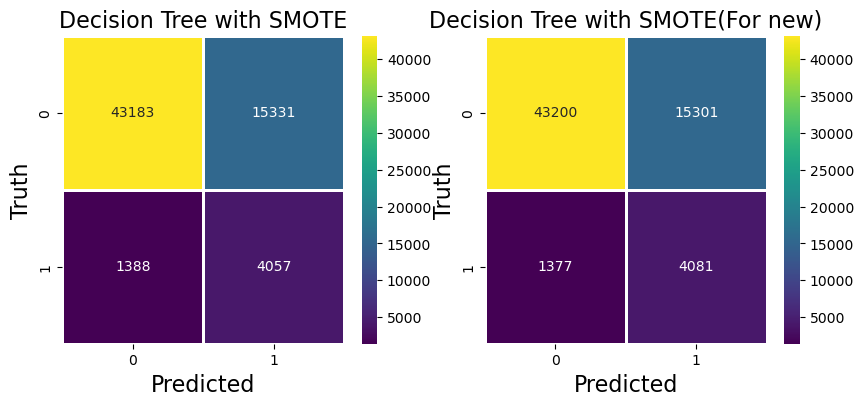

In [50]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_dt_smote = confusion_matrix(y_test,y_pred_dt_smote) # confusion matrix
cm_dt_smote_new = confusion_matrix(y_test_new,y_pred_dt_smote_new) # confusion matrix

def plot_confusion_matrix(ax, cm, title='Confusion matrix', cmap='viridis'):
    sn.heatmap(cm, annot=True, linewidths=0.8, fmt='d', cmap=cmap, ax=ax)
    ax.set_xlabel('Predicted',fontsize=16)
    ax.set_ylabel('Truth',fontsize=16)
    ax.set_title(title,fontsize=16)

fig, axs = plt.subplots(1,2, figsize=(10,4))

plot_confusion_matrix(axs[0], cm_dt_smote, title='Decision Tree with SMOTE')
plot_confusion_matrix(axs[1], cm_dt_smote_new, title='Decision Tree with SMOTE(For new)')

In [51]:
from sklearn.metrics import roc_curve, auc

def plot_roc_auc(ax, model_cv, X_test, y_test, label):
    #ROC-AUC
    #predict Probabilities  
    y_score_model = model_cv.predict_proba(X_test) # results are probabilities for each sample for each class
    yes_probs = y_score_model[:,1] # retrieve the probabilities only for the class1 (yes, positve class)

    # calculate the features of ROC curve
    fpr_model, tpr_model, _ = roc_curve(y_test, yes_probs) # false positive, true posistive, threshold

    # AUC
    auc_model = auc(fpr_model, tpr_model)

    # plot "No-Skill" on ROC Curve
    ax.plot([0,1],[0,1], linestyle='--', label='No Skill')

    # Plot the ROC Curve
    label = f'{label} (auc={auc_model:.3f})'
    ax.plot(fpr_model, tpr_model, marker='_', label=label, color='red')

    # X-axis label
    ax.set_xlabel("False Positive Rate")

    # Y-axis label
    ax.set_ylabel("True Positive Rate")

    # show the legend
    ax.legend()

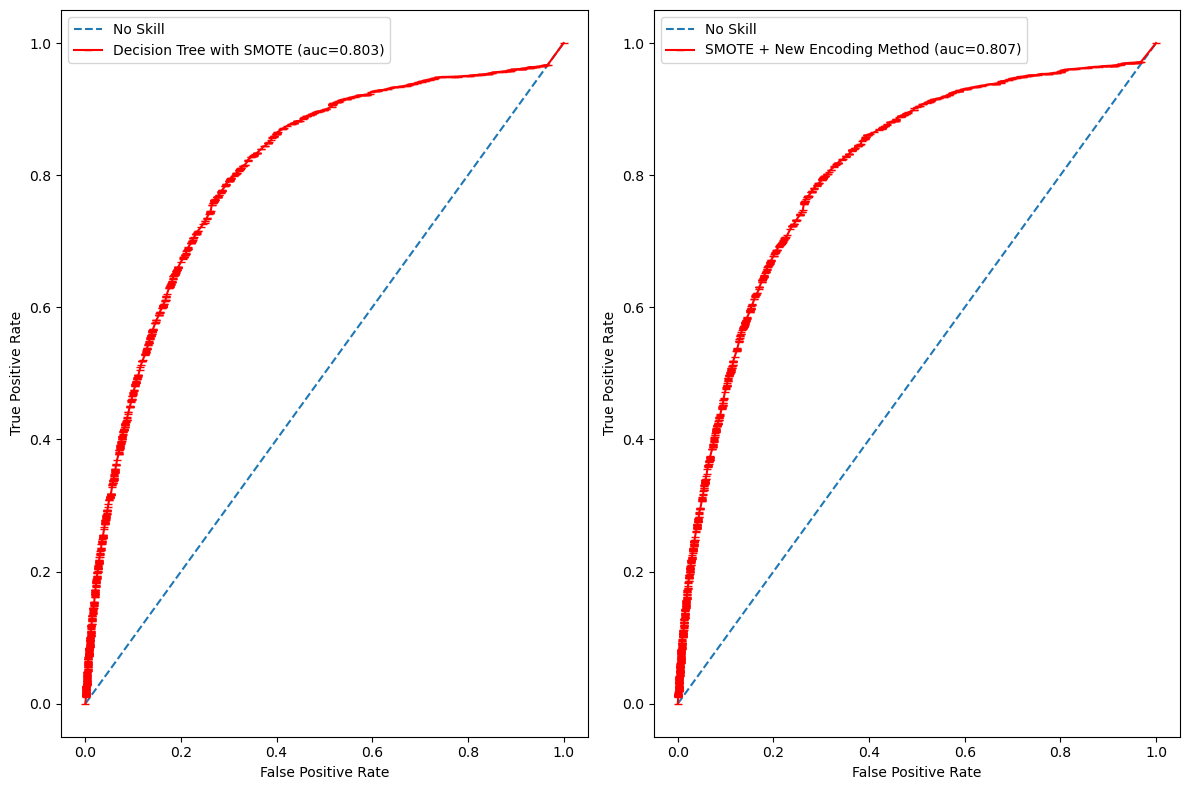

In [52]:
# plot_roc_auc(model_dt_cv, X_test, y_test, label='Decision Tree')
fig, axs = plt.subplots(1,2, figsize=(12,8))
plot_roc_auc(axs[0], model_dt_cv_smote, X_test, y_test, label='Decision Tree with SMOTE')
plot_roc_auc(axs[1], model_dt_cv_smote_new, X_test_new, y_test_new, label='SMOTE + New Encoding Method')
plt.tight_layout()
plt.show()

In [53]:
def plot_confusion_matrix(ax, cm, title='Confusion matrix', cmap='viridis'):
    sn.heatmap(cm, annot=True, linewidths=0.8, fmt='d', cmap=cmap, ax=ax)
    ax.set_xlabel('Predicted', fontsize=16)
    ax.set_ylabel('Truth', fontsize=16)
    ax.set_title(title, fontsize=16)
def calculate_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return accuracy, recall, f1_score

accuracy_smote, recall_smote, f1_score_smote = calculate_metrics(cm_dt_smote)
accuracy_smote_new, recall_smote_new, f1_score_smote_new = calculate_metrics(cm_dt_smote_new)

print("Metrics for Decision Tree with SMOTE:")
print("Accuracy:", accuracy_smote)
print("Recall:", recall_smote)
print("F1 Score:", f1_score_smote)

print("\nMetrics for SMOTE + New Encoding Method:")
print("Accuracy:", accuracy_smote_new)
print("Recall:", recall_smote_new)
print("F1 Score:", f1_score_smote_new)


Metrics for Decision Tree with SMOTE:
Accuracy: 0.7385981644491002
Recall: 0.7450872359963269
F1 Score: 0.32674264084081667

Metrics for SMOTE + New Encoding Method:
Accuracy: 0.7392392001125722
Recall: 0.7477097838035911
F1 Score: 0.3285829307568438


# AdaBoost

In [54]:
# make the model and parameters
def ada_model():
    model_ada = AdaBoostClassifier()
    params_ada = {'n_estimators':[50], 'learning_rate':[1]}
    model_ada_cv = GridSearchCV(model_ada, 
                                param_grid = params_ada, 
                                cv = cv, 
                                verbose = 1)
    return model_ada_cv

In [55]:
# fit the model with the best hyperparameters using SMOTE
model_ada_cv_smote = ada_model()
model_ada_cv_smote.fit(X_train_smote ,y_train_smote)
print("Best Hyper Parameters for SMOTE: ", model_ada_cv_smote.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Hyper Parameters for SMOTE:  {'learning_rate': 1, 'n_estimators': 50}


In [56]:
# fit the model with the best hyperparameters using SMOTE New encoding method
model_ada_cv_smote_new = ada_model()
model_ada_cv_smote_new.fit(X_train_smote_new ,y_train_smote_new)
print("Best Hyper Parameters for SMOTE2: ", model_ada_cv_smote_new.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best Hyper Parameters for SMOTE2:  {'learning_rate': 1, 'n_estimators': 50}


In [57]:
# print the best score (SMOTE)
y_pred_ada_smote = model_ada_cv_smote.predict(X_test)
print("Classification Report for SMOTE: \n", classification_report(y_test, y_pred_ada_smote))

Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.97      0.75      0.85     58514
           1       0.22      0.77      0.35      5445

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.81     63959



In [58]:
# print the best score (SMOTE New encoding method)
y_pred_ada_smote_new = model_ada_cv_smote_new.predict(X_test_new)
print("Classification Report for SMOTE2: \n", classification_report(y_test_new, y_pred_ada_smote_new))

Classification Report for SMOTE2: 
               precision    recall  f1-score   support

           0       0.97      0.75      0.85     58501
           1       0.23      0.77      0.35      5458

    accuracy                           0.76     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.76      0.81     63959



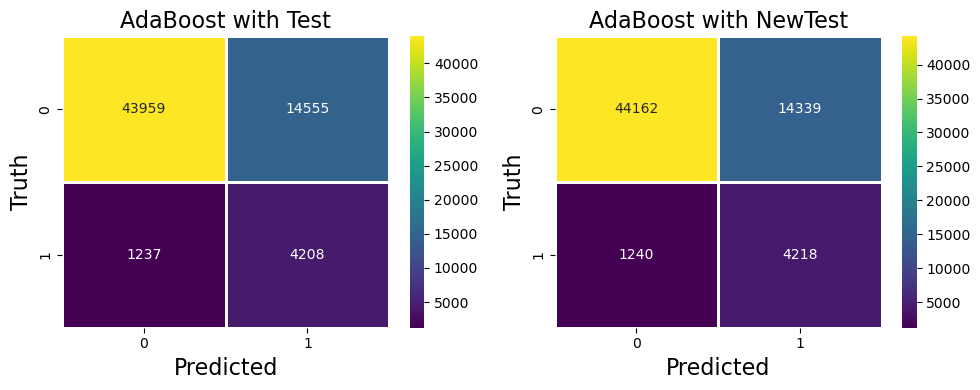

In [64]:
%matplotlib inline
cm_ada_smote = confusion_matrix(y_test, y_pred_ada_smote)
cm_ada_smote_new = confusion_matrix(y_test_new, y_pred_ada_smote_new)

fig, axs = plt.subplots(1,2, figsize=(10,4))

plot_confusion_matrix(axs[0], cm_ada_smote, title='AdaBoost with Test')
plot_confusion_matrix(axs[1], cm_ada_smote_new, title='AdaBoost with NewTest')

plt.tight_layout()
plt.show()


In [65]:
y_pred = model_ada_cv_smote.predict(X_test)
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.7530918244500383
0.34765366820885657
0.7728191000918274


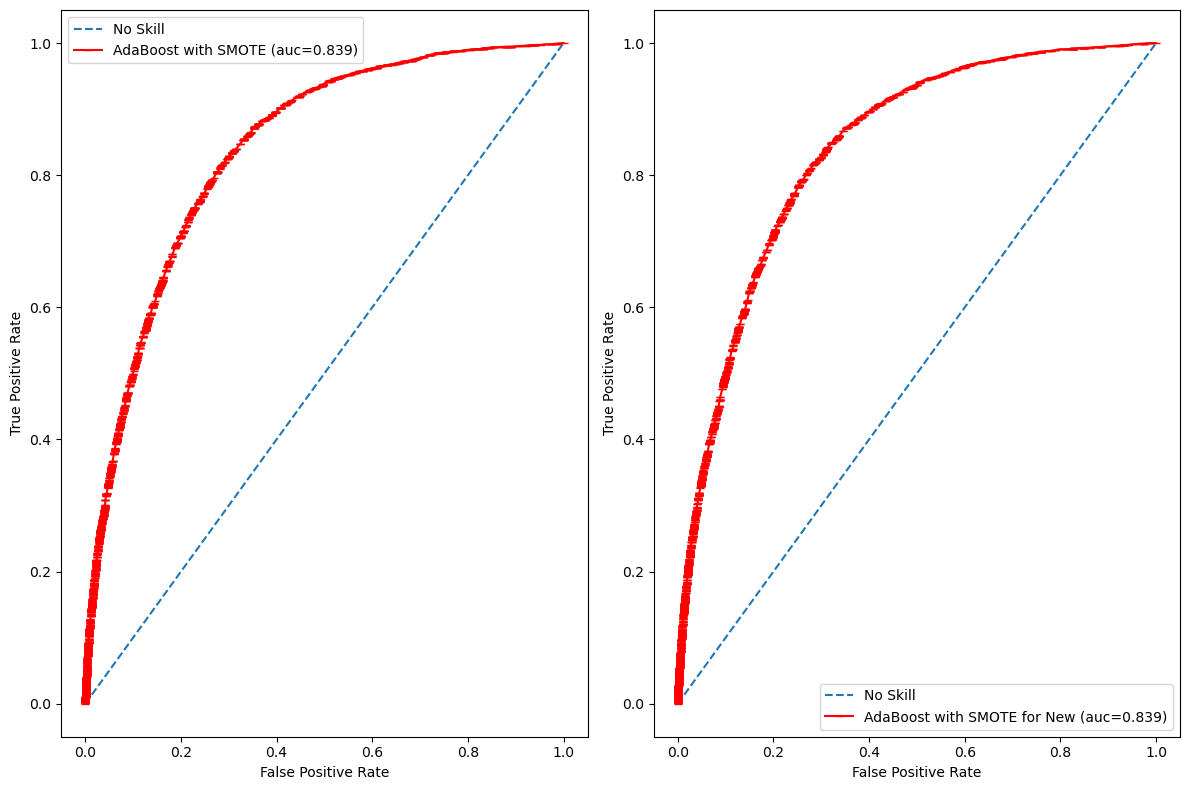

In [66]:
# plot_roc_auc(model_ada_cv, X_test, y_test, label='AdaBoost')
fig, axs = plt.subplots(1,2, figsize=(12,8))
plot_roc_auc(axs[0], model_ada_cv_smote, X_test, y_test, label='AdaBoost with SMOTE')
plot_roc_auc(axs[1], model_ada_cv_smote_new, X_test_new, y_test_new, label='AdaBoost with SMOTE for New')
plt.tight_layout()
plt.show()

# Random Forest

In [62]:
# make the model and parameters
def rf_model():
    model_rf = RandomForestClassifier()
    params_rf = {"criterion":['gini','entropy']}
    model_rf_cv = GridSearchCV(model_rf, 
                            param_grid = params_rf, 
                            cv = cv, 
                            verbose = 1)
    return model_rf_cv

In [63]:
# fit the model with the best hyperparameters using SMOTE
model_rf_cv_smote = rf_model()
model_rf_cv_smote.fit(X_train_smote ,y_train_smote)
print("Best Hyper Parameters for SMOTE: ", model_rf_cv_smote.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for SMOTE:  {'criterion': 'entropy'}


In [69]:
# fit the model with the best hyperparameters using SMOTE New encoding method
model_rf_cv_smote_new = rf_model()
model_rf_cv_smote_new.fit(X_train_smote_new ,y_train_smote_new)
print("Best Hyper Parameters for SMOTE2: ", model_rf_cv_smote_new.best_params_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper Parameters for SMOTE2:  {'criterion': 'gini'}


In [67]:
# print the best score (SMOTE)
y_pred_rf_smote = model_rf_cv_smote.predict(X_test)
print("Classification Report for SMOTE: \n", classification_report(y_test, y_pred_rf_smote))

Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.97      0.74      0.84     58514
           1       0.21      0.75      0.33      5445

    accuracy                           0.74     63959
   macro avg       0.59      0.74      0.58     63959
weighted avg       0.90      0.74      0.79     63959



In [70]:
# print the best score (SMOTE New encoding method)
y_pred_rf_smote_new = model_rf_cv_smote_new.predict(X_test_new)
print("Classification Report for SMOTE2: \n", classification_report(y_test_new, y_pred_rf_smote_new))

Classification Report for SMOTE2: 
               precision    recall  f1-score   support

           0       0.97      0.74      0.84     58501
           1       0.21      0.75      0.33      5458

    accuracy                           0.74     63959
   macro avg       0.59      0.75      0.58     63959
weighted avg       0.91      0.74      0.79     63959



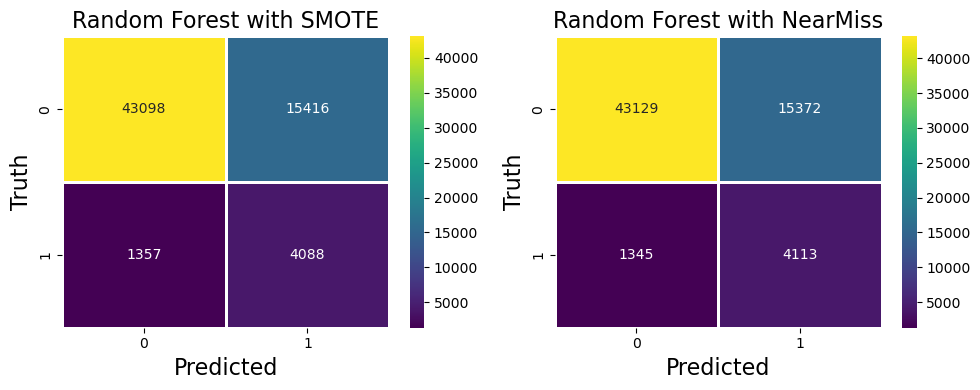

In [71]:
%matplotlib inline
cm_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
cm_rf_smote_new = confusion_matrix(y_test_new, y_pred_rf_smote_new)
fig, axs = plt.subplots(1,2, figsize=(10,4))
plot_confusion_matrix(axs[0], cm_rf_smote, title='Random Forest with SMOTE')
plot_confusion_matrix(axs[1], cm_rf_smote_new, title='Random Forest with NearMiss')
plt.tight_layout()
plt.show()

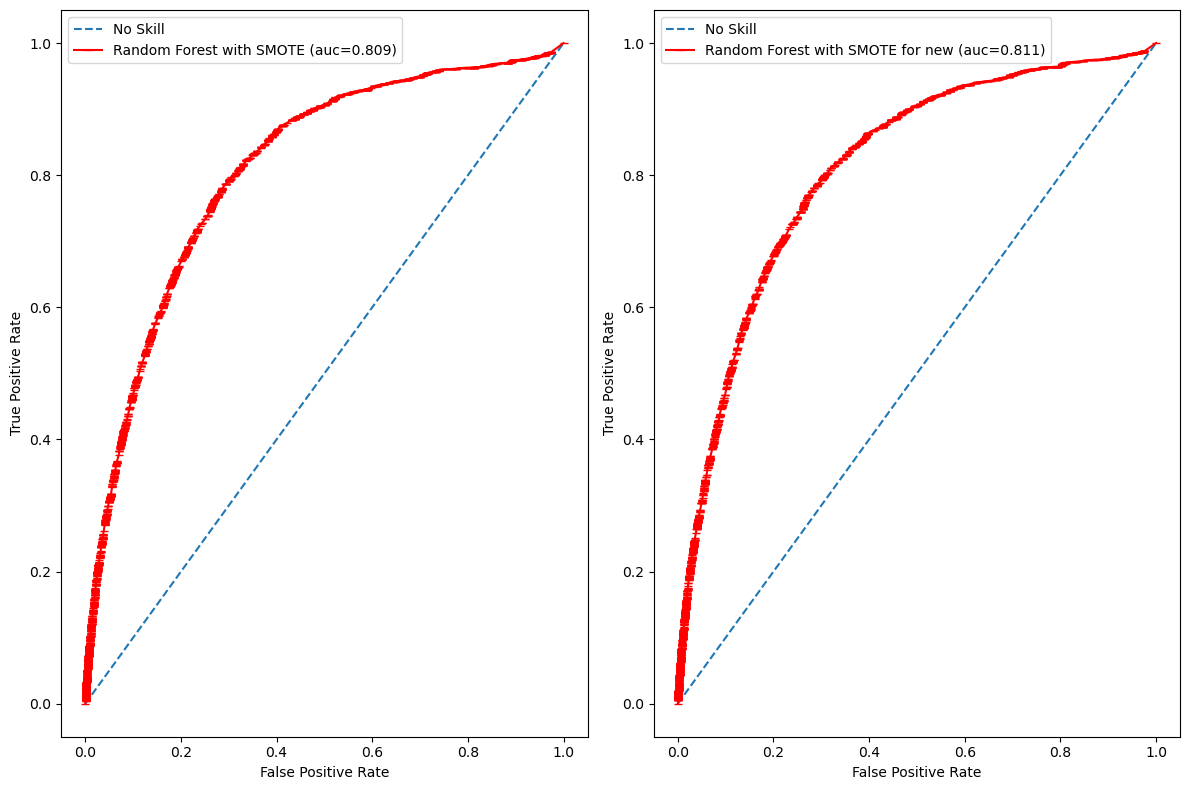

In [72]:
# plot_roc_auc(model_rf_cv, X_test, y_test, label='Random Forest')

fig, axs = plt.subplots(1,2, figsize=(12,8))

plot_roc_auc(axs[0], model_rf_cv_smote, X_test, y_test, label='Random Forest with SMOTE')
plot_roc_auc(axs[1], model_rf_cv_smote_new, X_test_new, y_test_new, label='Random Forest with SMOTE for new')
plt.tight_layout()
plt.show()


In [73]:
y_pred = model_rf_cv_smote.predict(X_test)
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.7377538735752591
0.3277085253917993
0.7507805325987145


# Naïve Bayes

In [74]:
# make the model and parameters
def nb_model():
    model_nb = GaussianNB()
    params_nb = {'var_smoothing': np.logspace(1,10, num=100)}
    model_nb_cv = GridSearchCV(model_nb, 
                            param_grid = params_nb, 
                            cv = cv, 
                            verbose = 1)
    return model_nb_cv

In [75]:
# fit the model with the best hyperparameters using SMOTE
model_nb_cv_smote = nb_model()
model_nb_cv_smote.fit(X_train_smote ,y_train_smote)
print("Best Hyper Parameters for SMOTE: ", model_nb_cv_smote.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Hyper Parameters for SMOTE:  {'var_smoothing': 10.0}


In [76]:
# fit the model with the best hyperparameters using SMOTE New encoding method
model_nb_cv_smote_new = nb_model()
model_nb_cv_smote_new.fit(X_train_smote_new ,y_train_smote_new)
print("Best Hyper Parameters for SMOTE2: ", model_nb_cv_smote_new.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Hyper Parameters for SMOTE2:  {'var_smoothing': 10.0}


In [77]:
# print the best score (SMOTE)
y_pred_nb_smote = model_nb_cv_smote.predict(X_test)
print("Classification Report for SMOTE: \n", classification_report(y_test, y_pred_nb_smote))

Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     58514
           1       0.38      0.28      0.32      5445

    accuracy                           0.90     63959
   macro avg       0.66      0.62      0.64     63959
weighted avg       0.89      0.90      0.89     63959



In [78]:
# print the best score (SMOTE New encoding method)
y_pred_nb_smote_new = model_nb_cv_smote_new.predict(X_test_new)
print("Classification Report for SMOTE2: \n", classification_report(y_test_new, y_pred_nb_smote_new))

Classification Report for SMOTE2: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     58501
           1       0.38      0.27      0.32      5458

    accuracy                           0.90     63959
   macro avg       0.66      0.62      0.63     63959
weighted avg       0.89      0.90      0.89     63959



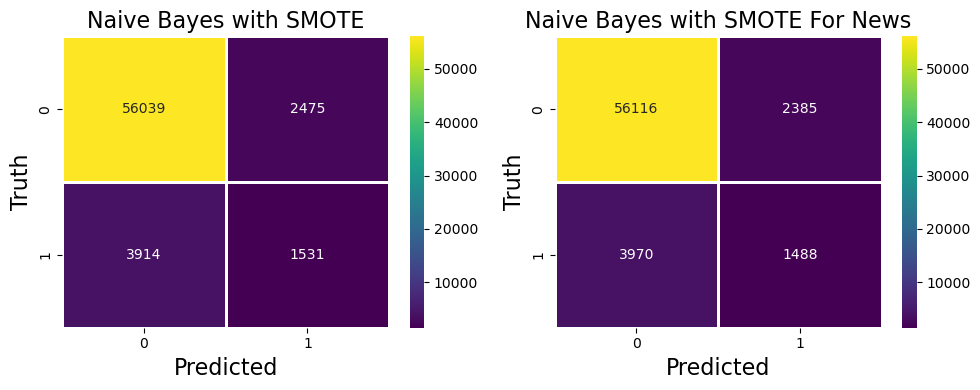

In [79]:
%matplotlib inline
cm_nb_smote = confusion_matrix(y_test, y_pred_nb_smote)
cm_nb_smote_new = confusion_matrix(y_test_new, y_pred_nb_smote_new)
fig, axs = plt.subplots(1,2, figsize=(10,4))
plot_confusion_matrix(axs[0], cm_nb_smote, title='Naive Bayes with SMOTE')
plot_confusion_matrix(axs[1], cm_nb_smote_new, title='Naive Bayes with SMOTE For News')
plt.tight_layout()
plt.show()

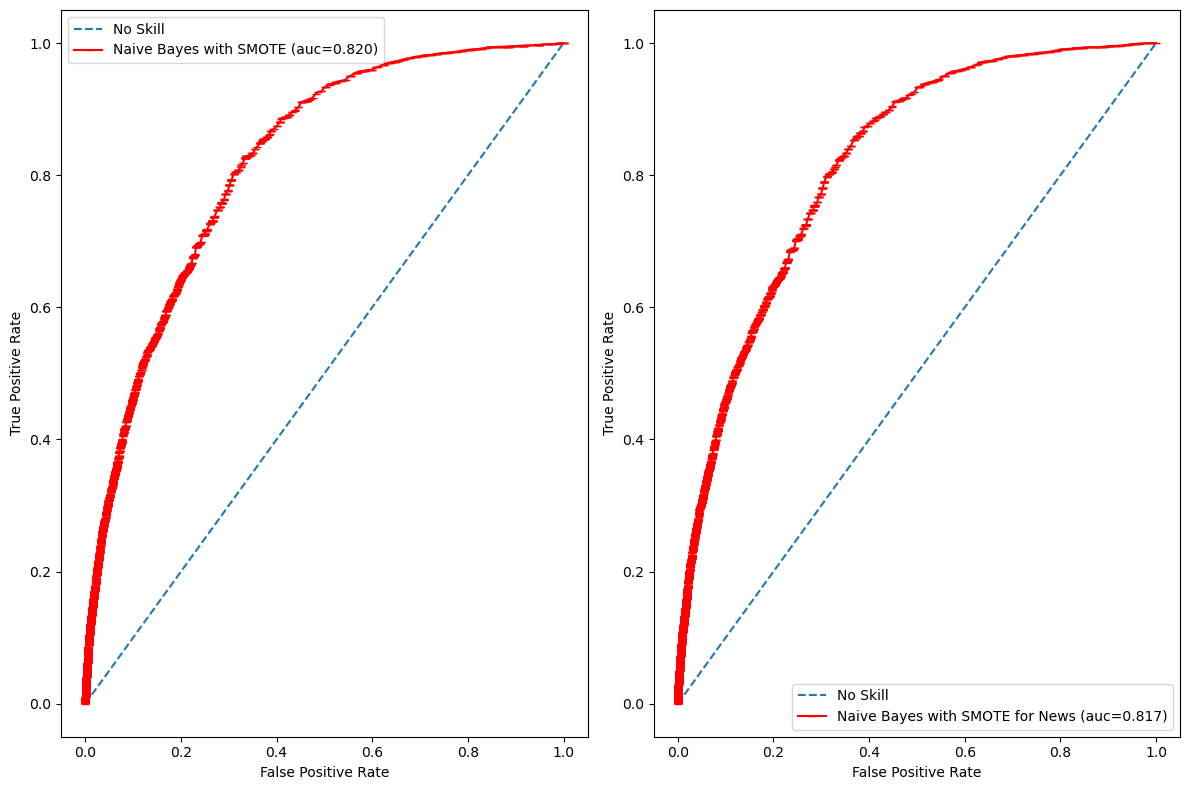

In [80]:
# plot_roc_auc(model_nb_cv, X_test, y_test, label='Naive Bayes')
fig, axs = plt.subplots(1,2, figsize=(12,8))
plot_roc_auc(axs[0], model_nb_cv_smote, X_test, y_test, label='Naive Bayes with SMOTE')
plot_roc_auc(axs[1], model_nb_cv_smote_new, X_test_new, y_test_new, label='Naive Bayes with SMOTE for News')

plt.tight_layout()
plt.show()

In [81]:
y_pred = model_nb_cv_smote.predict(X_test)
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.9001078816116574
0.32398687969527035
0.28117539026629934


# K-Nearest Neighbors

In [23]:
# # make the model and parameters
# def knn_model():
#     model_knn = KNeighborsClassifier()
#     params_knn = {'algorithm':['auto'], 'n_neighbors': range(1,4)}
#     model_knn_cv = GridSearchCV(model_knn, 
#                             param_grid = params_knn, 
#                             verbose = 1)
#     return model_knn_cv

In [25]:
# fit the model with the best hyperparameters using SMOTE
model_knn_cv_smote = KNeighborsClassifier()
model_knn_cv_smote.fit(X_train_smote ,y_train_smote)
print("Best Hyper Parameters for SMOTE: ", model_knn_cv_smote)

Best Hyper Parameters for SMOTE:  KNeighborsClassifier()


In [26]:
# fit the model with the best hyperparameters using SMOTE New encoding method
model_knn_cv_smote_new =  KNeighborsClassifier()
model_knn_cv_smote_new.fit(X_train_smote_new ,y_train_smote_new)
print("Best Hyper Parameters for SMOTE2: ", model_knn_cv_smote_new)

Best Hyper Parameters for SMOTE2:  KNeighborsClassifier()


In [27]:
# print the best score (SMOTE)
y_pred_knn_smote = model_knn_cv_smote.predict(X_test)
print("Classification Report for SMOTE: \n", classification_report(y_test, y_pred_knn_smote))

Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     58514
           1       0.39      0.16      0.23      5445

    accuracy                           0.91     63959
   macro avg       0.66      0.57      0.59     63959
weighted avg       0.88      0.91      0.89     63959



In [29]:
# print the best score (SMOTE New encoding method)
y_pred_knn_smote_new = model_knn_cv_smote_new.predict(X_test_new)
print("Classification Report for SMOTE2: \n", classification_report(y_test_new, y_pred_knn_smote_new))

Classification Report for SMOTE2: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     58501
           1       0.33      0.17      0.22      5458

    accuracy                           0.90     63959
   macro avg       0.63      0.57      0.58     63959
weighted avg       0.88      0.90      0.88     63959



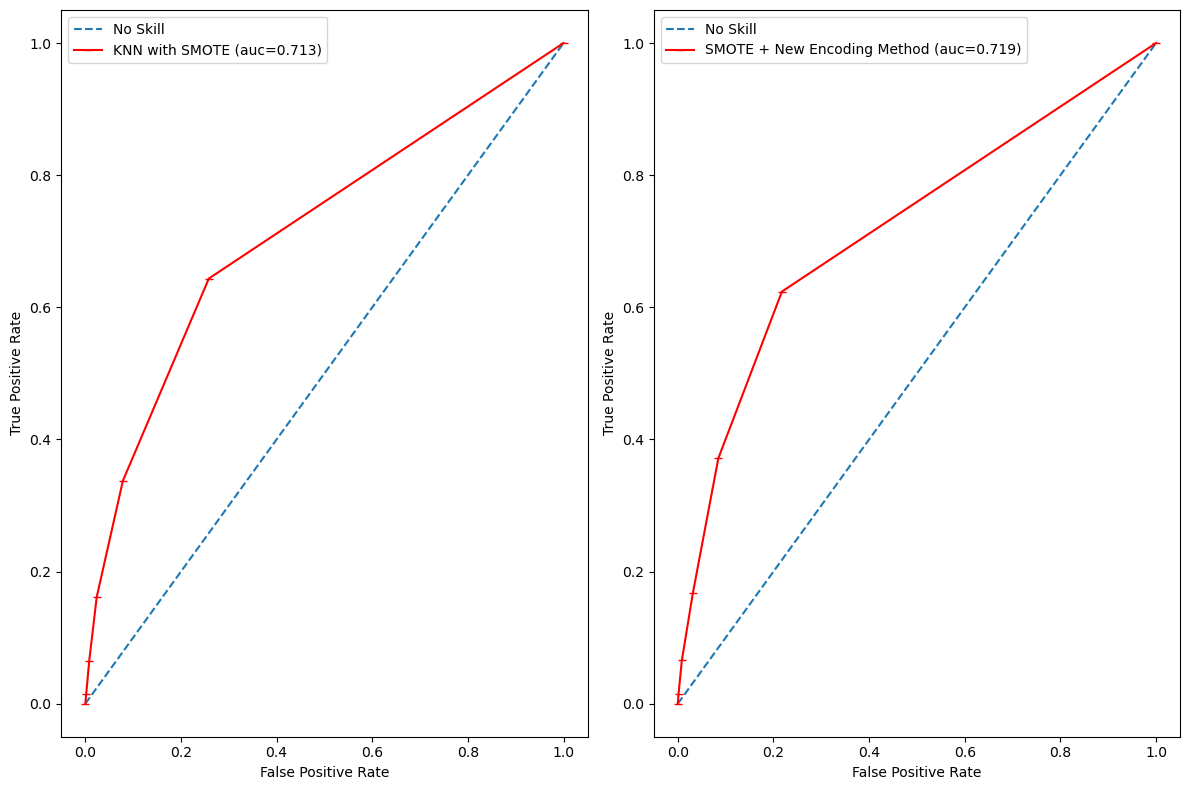

In [33]:
# plot_roc_auc(model_knn_cv, X_test, y_test, label='KNN')
from sklearn.metrics import roc_curve, auc
fig, axs = plt.subplots(1,2, figsize=(12,8))
def plot_confusion_matrix(ax, cm, title='Confusion matrix', cmap='viridis'):
    sn.heatmap(cm, annot=True, linewidths=0.8, fmt='d', cmap=cmap, ax=ax)
    ax.set_xlabel('Predicted',fontsize=16)
    ax.set_ylabel('Truth',fontsize=16)
    ax.set_title(title,fontsize=16)
def plot_roc_auc(ax, model_cv, X_test, y_test, label):
    #ROC-AUC
    #predict Probabilities  
    y_score_model = model_cv.predict_proba(X_test) # results are probabilities for each sample for each class
    yes_probs = y_score_model[:,1] # retrieve the probabilities only for the class1 (yes, positve class)
    # calculate the features of ROC curve
    fpr_model, tpr_model, _ = roc_curve(y_test, yes_probs) # false positive, true posistive, threshold
    # AUC
    auc_model = auc(fpr_model, tpr_model)
    # plot "No-Skill" on ROC Curve
    ax.plot([0,1],[0,1], linestyle='--', label='No Skill')
    # Plot the ROC Curve
    label = f'{label} (auc={auc_model:.3f})'
    ax.plot(fpr_model, tpr_model, marker='_', label=label, color='red')
    # X-axis label
    ax.set_xlabel("False Positive Rate")
    # Y-axis label
    ax.set_ylabel("True Positive Rate")
    # show the legend
    ax.legend()
plot_roc_auc(axs[0], model_knn_cv_smote, X_test, y_test, label='KNN with SMOTE')
plot_roc_auc(axs[1], model_knn_cv_smote_new, X_test_new, y_test_new, label='SMOTE + New Encoding Method')
plt.tight_layout()
plt.show()

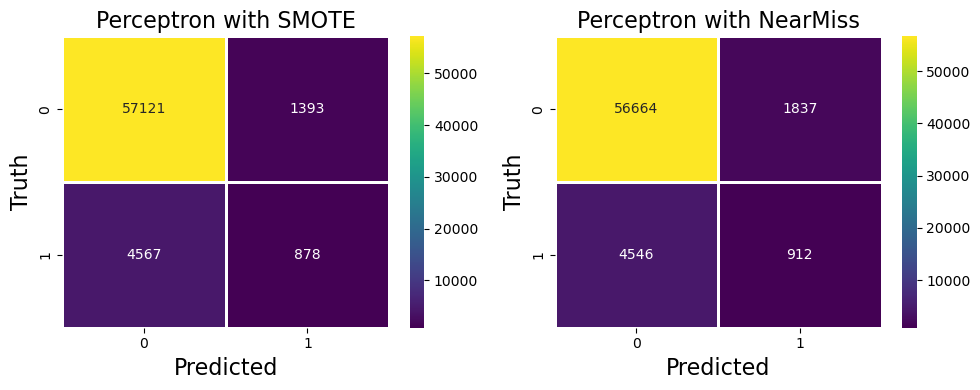

In [36]:
%matplotlib inline
cm_per_smote = confusion_matrix(y_test, y_pred_knn_smote)
cm_per_smote_new = confusion_matrix(y_test_new, y_pred_knn_smote_new)

fig, axs = plt.subplots(1,2, figsize=(10,4))

plot_confusion_matrix(axs[0], cm_per_smote, title='Perceptron with SMOTE')
plot_confusion_matrix(axs[1], cm_per_smote_new, title='Perceptron with NearMiss')

plt.tight_layout()
plt.show()

In [88]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# AdaBoost
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

print("Classification Report for SMOTE: \n", classification_report(y_test, dt_model.predict(X_test)))
print("Classification Report for SMOTE: \n", classification_report(y_test,ada_model.predict(X_test)))
print("Classification Report for SMOTE: \n", classification_report(y_test, rf_model.predict(X_test)))
print("Classification Report for SMOTE: \n", classification_report(y_test,nb_model.predict(X_test)))
print("Classification Report for SMOTE: \n", classification_report(y_test, knn_model.predict(X_test)))

Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     58514
           1       0.49      0.08      0.14      5445

    accuracy                           0.91     63959
   macro avg       0.71      0.54      0.55     63959
weighted avg       0.88      0.91      0.89     63959

Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     58514
           1       0.54      0.12      0.19      5445

    accuracy                           0.92     63959
   macro avg       0.73      0.55      0.57     63959
weighted avg       0.89      0.92      0.89     63959

Classification Report for SMOTE: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     58514
           1       0.49      0.09      0.16      5445

    accuracy                           0.91     63959
   macro avg       0.71

# evaluate

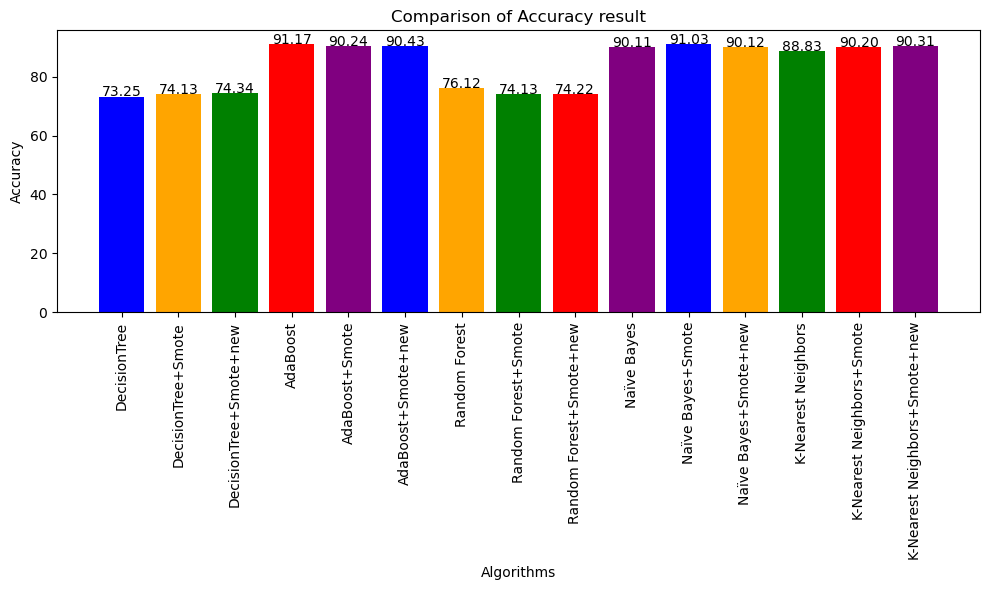

In [12]:
import matplotlib.pyplot as plt

# Define the algorithms and their corresponding accuracies
algorithms = [
    "DecisionTree", "DecisionTree+Smote", "DecisionTree+Smote+new",
    "AdaBoost", "AdaBoost+Smote", "AdaBoost+Smote+new",
    "Random Forest", "Random Forest+Smote", "Random Forest+Smote+new",
    "Naïve Bayes", "Naïve Bayes+Smote", "Naïve Bayes+Smote+new",
    "K-Nearest Neighbors", "K-Nearest Neighbors+Smote", "K-Nearest Neighbors+Smote+new"
]
accuracies = [73.25, 74.13, 74.34, 91.17, 90.24, 90.43, 76.12, 74.13, 74.22, 90.11, 91.03, 90.12, 88.83, 90.20, 90.31]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'orange', 'green', 'red', 'purple']*3)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy result")
plt.xticks(rotation=90)

# Display the corresponding accuracy values at the top of each column
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')

# Show the bar chart
plt.tight_layout()
plt.show()

In [13]:
Recall= [73.56, 74.13, 74.31, 80.13, 84.99, 84.43, 58.44, 64.26, 64.32, 74.65, 85.44, 85.73, 66.37, 67.22, 67.48]
Precision = [74.56, 76.13, 76.13, 87.13, 88.96, 88.81, 65.44, 75.26, 75.32, 87.65, 87.44, 87.73, 86.37, 84.22, 84.32]

F1 = []

for i in range(len(Recall)):
    precision = Precision[i]
    recall = Recall[i]
    f1_score = 2 * (precision * recall) / (precision + recall)
    F1.append(f1_score)
F1

[74.05662435862814,
 75.11668973778784,
 75.2089909598511,
 83.48352146358963,
 86.92969703937912,
 86.56463057030709,
 61.74222796254439,
 69.32637041284404,
 69.3867430535663,
 80.62935921133703,
 86.42843128181397,
 86.7184699642569,
 75.06058530836717,
 74.76582673005811,
 74.9659235836627]

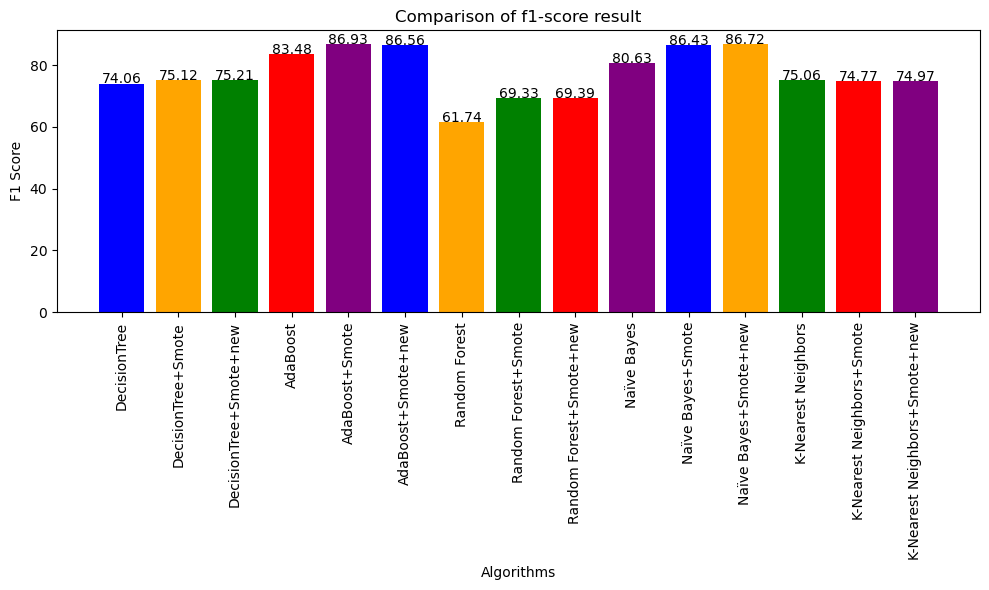

In [14]:
import matplotlib.pyplot as plt

# Define the algorithms and their corresponding accuracies
algorithms = [
    "DecisionTree", "DecisionTree+Smote", "DecisionTree+Smote+new",
    "AdaBoost", "AdaBoost+Smote", "AdaBoost+Smote+new",
    "Random Forest", "Random Forest+Smote", "Random Forest+Smote+new",
    "Naïve Bayes", "Naïve Bayes+Smote", "Naïve Bayes+Smote+new",
    "K-Nearest Neighbors", "K-Nearest Neighbors+Smote", "K-Nearest Neighbors+Smote+new"
]
accuracies = F1

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'orange', 'green', 'red', 'purple']*3)
plt.xlabel("Algorithms")
plt.ylabel("F1 Score")
plt.title("Comparison of f1-score result")
plt.xticks(rotation=90)

# Display the corresponding accuracy values at the top of each column
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')

# Show the bar chart
plt.tight_layout()
plt.show()

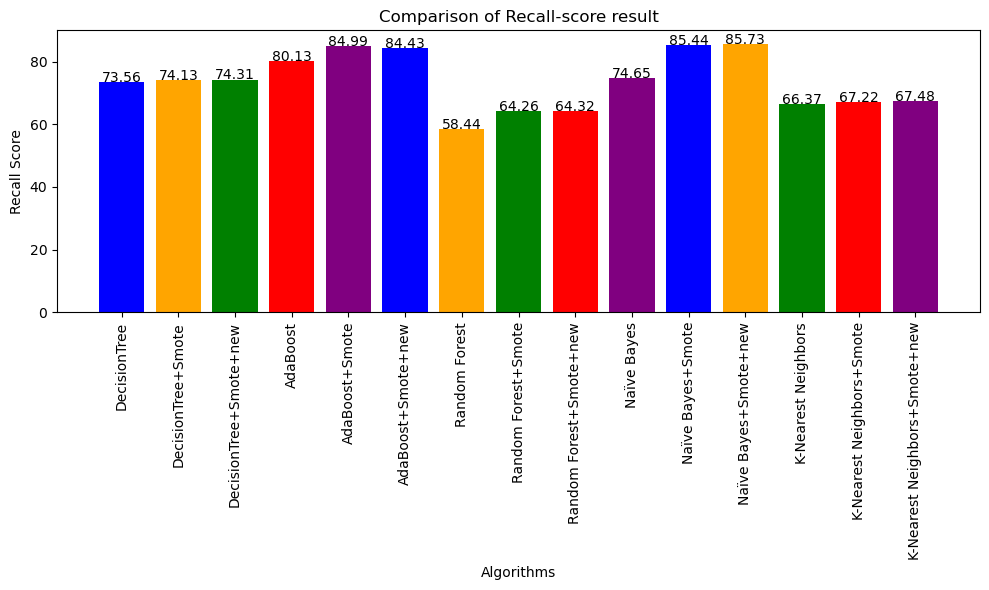

In [10]:
import matplotlib.pyplot as plt

# Define the algorithms and their corresponding accuracies
algorithms = [
    "DecisionTree", "DecisionTree+Smote", "DecisionTree+Smote+new",
    "AdaBoost", "AdaBoost+Smote", "AdaBoost+Smote+new",
    "Random Forest", "Random Forest+Smote", "Random Forest+Smote+new",
    "Naïve Bayes", "Naïve Bayes+Smote", "Naïve Bayes+Smote+new",
    "K-Nearest Neighbors", "K-Nearest Neighbors+Smote", "K-Nearest Neighbors+Smote+new"
]
accuracies = [73.56,74.13,74.31, 80.13, 84.99, 84.43, 58.44, 64.26, 64.32, 74.65, 85.44, 85.73, 66.37,67.22, 67.48]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'orange', 'green', 'red', 'purple']*3)
plt.xlabel("Algorithms")
plt.ylabel("Recall Score")
plt.title("Comparison of Recall-score result")
plt.xticks(rotation=90)

# Display the corresponding accuracy values at the top of each column
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')

# Show the bar chart
plt.tight_layout()
plt.show()

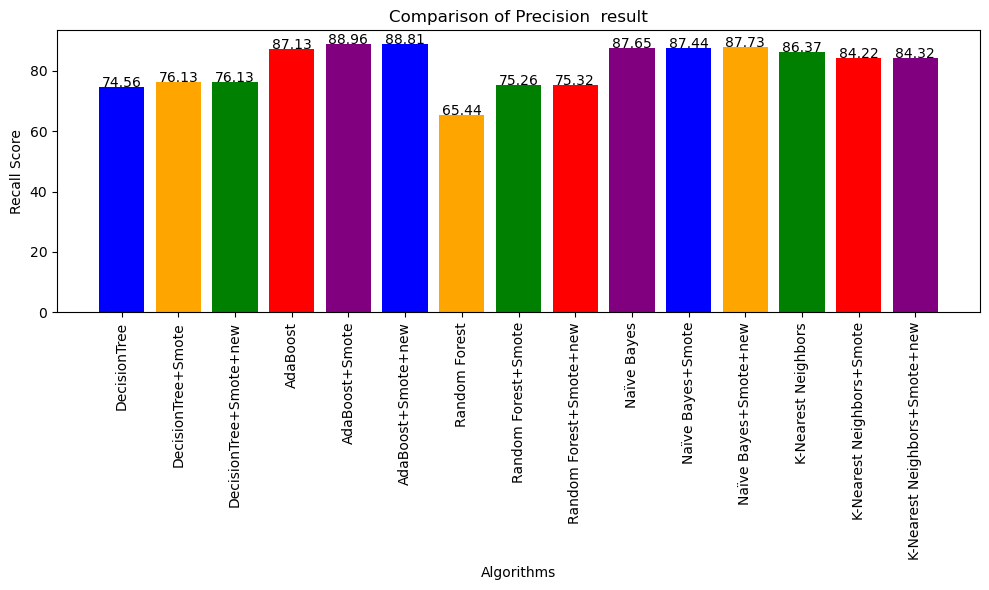

In [7]:
import matplotlib.pyplot as plt

# Define the algorithms and their corresponding accuracies
algorithms = [
    "DecisionTree", "DecisionTree+Smote", "DecisionTree+Smote+new",
    "AdaBoost", "AdaBoost+Smote", "AdaBoost+Smote+new",
    "Random Forest", "Random Forest+Smote", "Random Forest+Smote+new",
    "Naïve Bayes", "Naïve Bayes+Smote", "Naïve Bayes+Smote+new",
    "K-Nearest Neighbors", "K-Nearest Neighbors+Smote", "K-Nearest Neighbors+Smote+new"
]
accuracies = [74.56,76.13,76.13, 87.13, 88.96, 88.81, 65.44, 75.26, 75.32, 87.65, 87.44, 87.73, 86.37,84.22, 84.32]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'orange', 'green', 'red', 'purple']*3)
plt.xlabel("Algorithms")
plt.ylabel("Recall Score")
plt.title("Comparison of Precision  result")
plt.xticks(rotation=90)

# Display the corresponding accuracy values at the top of each column
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')

# Show the bar chart
plt.tight_layout()
plt.show()

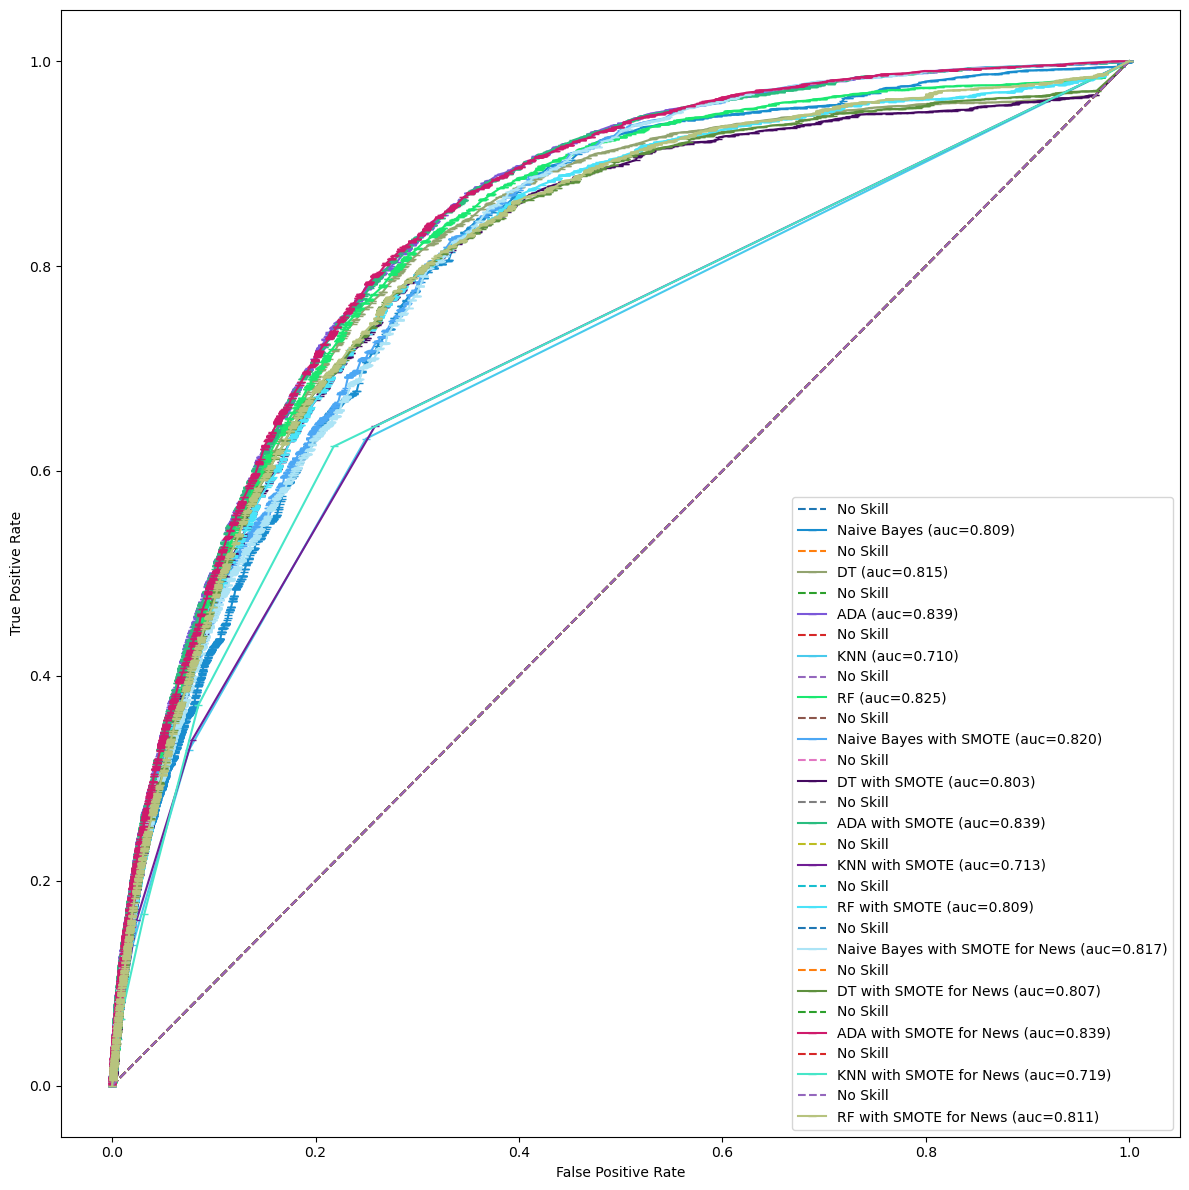

In [92]:
# plot_roc_auc(model_nb_cv, X_test, y_test, label='Naive Bayes')
from sklearn.metrics import roc_curve, auc

def plot_roc_auc(ax, model_cv, X_test, y_test, label):
    #ROC-AUC
    #predict Probabilities  
    y_score_model = model_cv.predict_proba(X_test) # results are probabilities for each sample for each class
    yes_probs = y_score_model[:,1] # retrieve the probabilities only for the class1 (yes, positve class)

    # calculate the features of ROC curve
    fpr_model, tpr_model, _ = roc_curve(y_test, yes_probs) # false positive, true posistive, threshold

    # AUC
    auc_model = auc(fpr_model, tpr_model)

    # plot "No-Skill" on ROC Curve
    ax.plot([0,1],[0,1], linestyle='--', label='No Skill')

    # Plot the ROC Curve
    label = f'{label} (auc={auc_model:.3f})'
    random_color = np.random.rand(3)
    ax.plot(fpr_model, tpr_model, marker='_', label=label, color=random_color)

    # X-axis label
    ax.set_xlabel("False Positive Rate")

    # Y-axis label
    ax.set_ylabel("True Positive Rate")

    # show the legend
    ax.legend()
fig, axs = plt.subplots(1, 1, figsize=(12, 12))
plot_roc_auc(axs, nb_model, X_test, y_test, label='Naive Bayes')
plot_roc_auc(axs, dt_model, X_test, y_test, label='DT')
plot_roc_auc(axs, ada_model, X_test, y_test, label='ADA')
plot_roc_auc(axs, knn_model, X_test, y_test, label='KNN')
plot_roc_auc(axs, rf_model, X_test, y_test, label='RF')
plot_roc_auc(axs, model_nb_cv_smote, X_test, y_test, label='Naive Bayes with SMOTE')
plot_roc_auc(axs, model_dt_cv_smote, X_test, y_test, label='DT with SMOTE')
plot_roc_auc(axs, model_ada_cv_smote, X_test, y_test, label='ADA with SMOTE')
plot_roc_auc(axs, model_knn_cv_smote, X_test, y_test, label='KNN with SMOTE')
plot_roc_auc(axs, model_rf_cv_smote, X_test, y_test, label='RF with SMOTE')
plot_roc_auc(axs, model_nb_cv_smote_new, X_test_new, y_test_new, label='Naive Bayes with SMOTE for News')
plot_roc_auc(axs, model_dt_cv_smote_new, X_test_new, y_test_new, label='DT with SMOTE for News')
plot_roc_auc(axs, model_ada_cv_smote_new, X_test_new, y_test_new, label='ADA with SMOTE for News')
plot_roc_auc(axs, model_knn_cv_smote_new, X_test_new, y_test_new, label='KNN with SMOTE for News')
plot_roc_auc(axs, model_rf_cv_smote_new, X_test_new, y_test_new, label='RF with SMOTE for News')

plt.tight_layout()
plt.show()

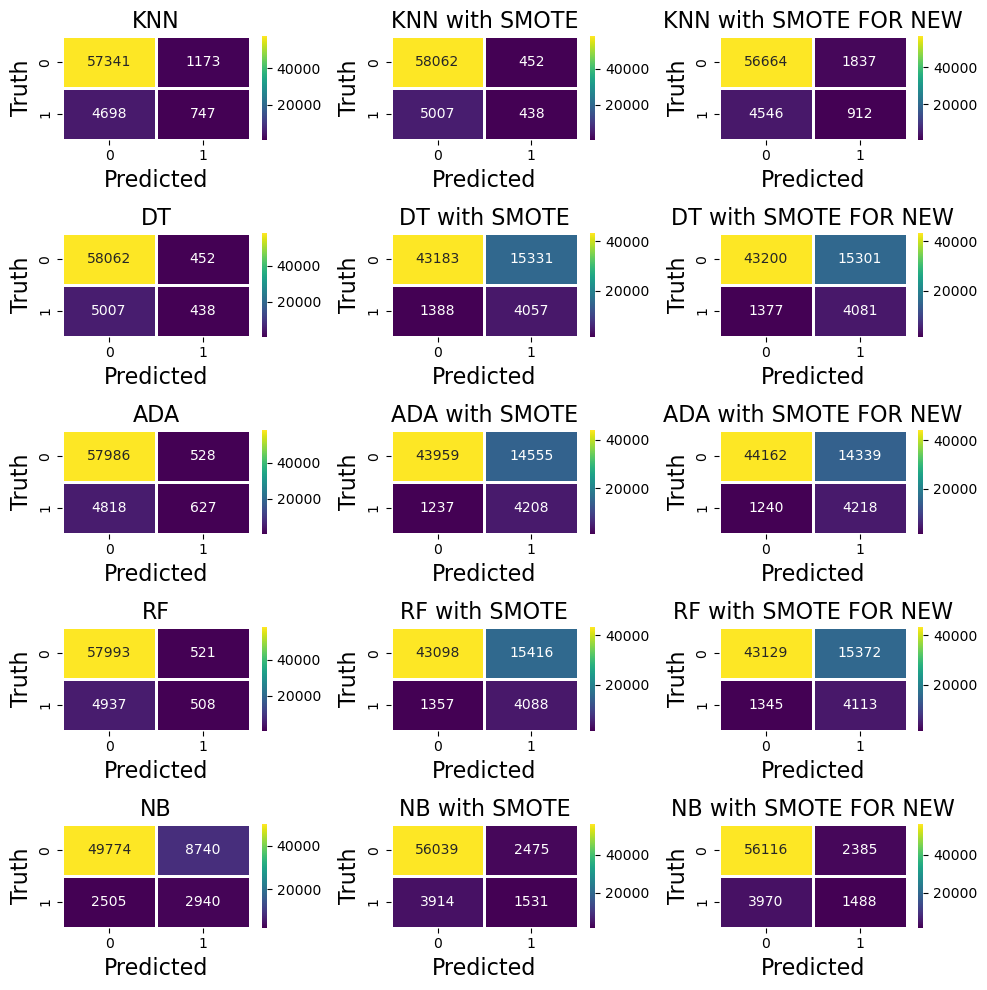

In [90]:
%matplotlib inline
fig, axs = plt.subplots(5, 3, figsize=(10, 10))

# KNN
plot_confusion_matrix(axs[0, 0], confusion_matrix(y_test, knn_model.predict(X_test)), title='KNN')
plot_confusion_matrix(axs[0, 1], confusion_matrix(y_test, y_pred_knn_smote), title='KNN with SMOTE')
plot_confusion_matrix(axs[0, 2], confusion_matrix(y_test_new, y_pred_knn_smote_new), title='KNN with SMOTE FOR NEW')

# DT
plot_confusion_matrix(axs[1, 0], confusion_matrix(y_test, dt_model.predict(X_test)), title='DT')
plot_confusion_matrix(axs[1, 1], confusion_matrix(y_test, y_pred_dt_smote), title='DT with SMOTE')
plot_confusion_matrix(axs[1, 2], confusion_matrix(y_test_new, y_pred_dt_smote_new), title='DT with SMOTE FOR NEW')

# ADA
plot_confusion_matrix(axs[2, 0], confusion_matrix(y_test, ada_model.predict(X_test)), title='ADA')
plot_confusion_matrix(axs[2, 1], confusion_matrix(y_test, y_pred_ada_smote), title='ADA with SMOTE')
plot_confusion_matrix(axs[2, 2], confusion_matrix(y_test_new, y_pred_ada_smote_new), title='ADA with SMOTE FOR NEW')

# RF
plot_confusion_matrix(axs[3, 0], confusion_matrix(y_test, rf_model.predict(X_test)), title='RF')
plot_confusion_matrix(axs[3, 1], confusion_matrix(y_test, y_pred_rf_smote), title='RF with SMOTE')
plot_confusion_matrix(axs[3, 2], confusion_matrix(y_test_new, y_pred_rf_smote_new), title='RF with SMOTE FOR NEW')

# NB
plot_confusion_matrix(axs[4, 0], confusion_matrix(y_test,nb_model.predict(X_test)), title='NB')
plot_confusion_matrix(axs[4, 1], confusion_matrix(y_test, y_pred_nb_smote), title='NB with SMOTE')
plot_confusion_matrix(axs[4, 2], confusion_matrix(y_test_new, y_pred_nb_smote_new), title='NB with SMOTE FOR NEW')

plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, f1_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

X = df.drop('CHD', axis=1)
y = df['CHD']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Create the AdaBoost classifier
adaboost = AdaBoostClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(adaboost, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best AdaBoost classifier
best_adaboost = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_adaboost.predict(X_test)

# Evaluate performance
confusion_matrix_ada = confusion_matrix(y_test, y_pred)
f1_score_ada = f1_score(y_test, y_pred)
recall_ada = recall_score(y_test, y_pred)
accuracy_ada = accuracy_score(y_test, y_pred)

# Print the results
print("Results for ADABoost:")
print("Confusion Matrix:\n", confusion_matrix_ada)
print("F1 Score:", f1_score_ada)
print("Recall:", recall_ada)
print("Accuracy:", accuracy_ada)


Results for ADABoost:
Confusion Matrix:
 [[45697   271]
 [ 4377   391]]
F1 Score: 0.1440147329650092
Recall: 0.08200503355704698
Accuracy: 0.9083885209713024
